## Problem Set #4

MACS 30100, Dr. Evans
<br>
Due Monday, Feb. 5 at 11:30am
<br>
Liqiang Yu

### Problem 1
Multiple linear regression (4 points).

(a) Import the data using pandas.read csv() function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the na values=... option.

In [495]:
import pandas as pd
auto_data = pd.read_csv('Auto.csv', na_values = '?') #manually check 
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(b) Produce a scatterplot matrix which includes all of the quantitative variables (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin). [Use the pandas scatterplot function in the code block below.]

<IPython.core.display.Javascript object>


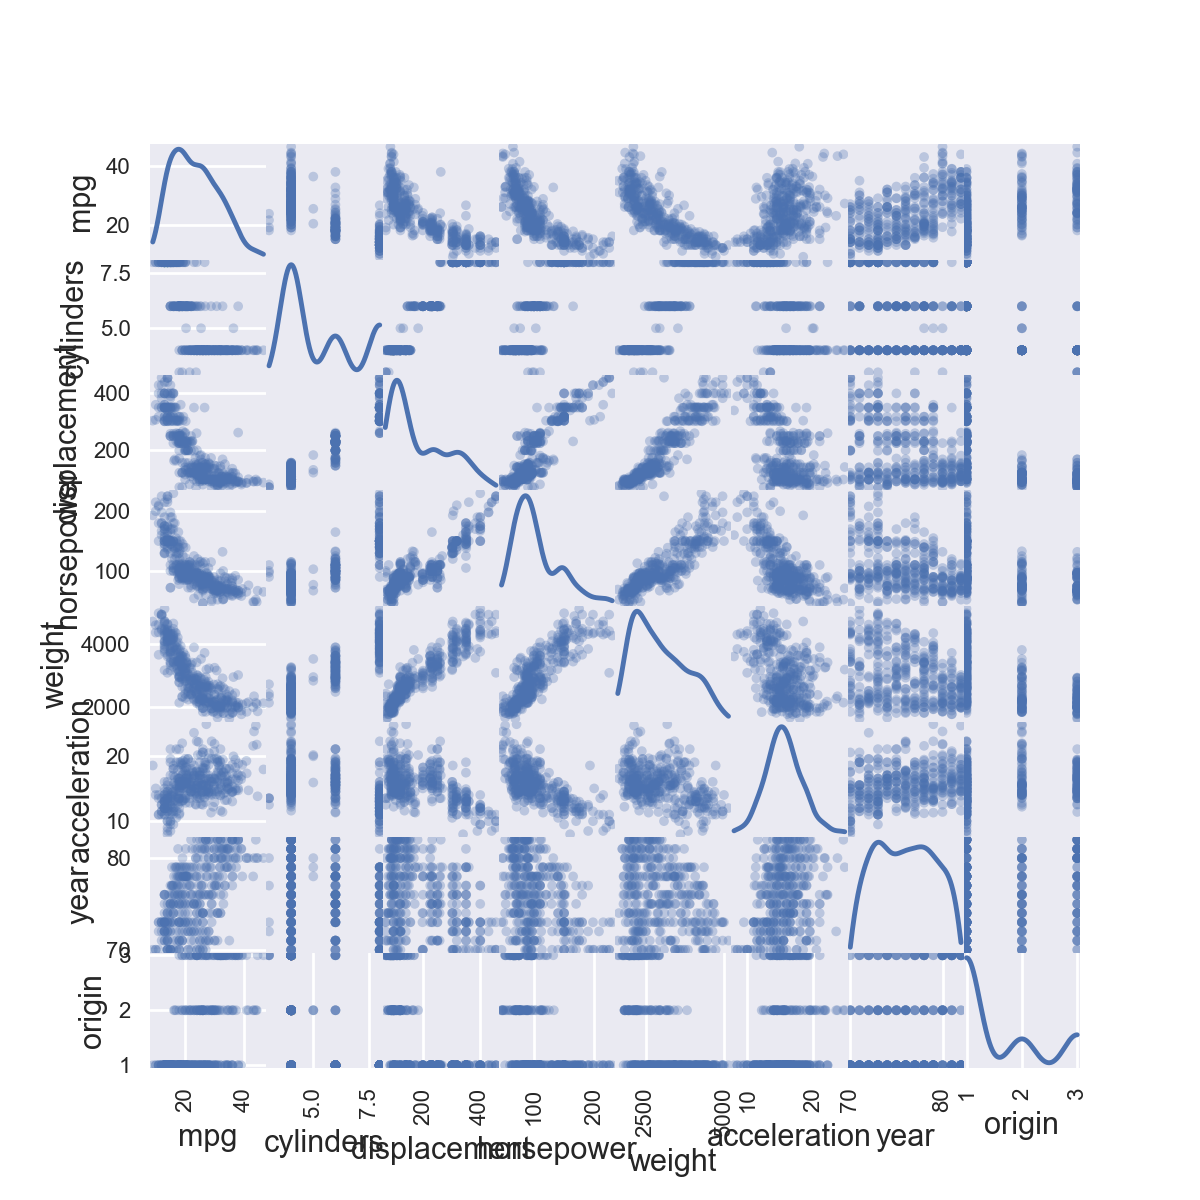

In [496]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib notebook
scatter_matrix(auto_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde')
plt.show()

(c) Compute the correlation matrix for the quantitative variables (8×8) using the DataFrame.corr() method.

In [497]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


(d)Estimate the following multiple linear regression model of mpg on all other quantitative variables, where u i is an error term for each observation, using Python’s statsmodels.api.OLS() function.

In [498]:
import statsmodels.api as sm
auto_data['const'] = 1
X1=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'const']
reg1 = sm.OLS(auto_data['mpg'], auto_data[X1], missing = 'drop')
result = reg1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        15:54:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526   

i. Which of the coeﬃcients is statistically signiﬁcant at the 1% level?

From the table above, coefficients of displacement, weight, year and origin are at the 1% significant level.

ii. Which of the coeﬃcients is NOT statistically signiﬁcant at the 10% level?

Coefficients of cylinders, horsepower and acceleration are not at the 10% significant level.

iii. Give an interpretation in words of the estimated coeﬃcient β 6 on year i using the estimated value of β 6 .

Holding all other independent variables constant, the miles per gallon is expected to increase 0.7508 on averge for a one unit increase in year.

(e) Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with mpg i ?

It looks like that displacment, horsepower and weight are the three variables to have a nonlinear relationship with mpg.

i. Estimate a new multiple regression model by OLS in which you include squared terms on the three variables you identiﬁed as having a nonlinear relationship to mpg i as well as a squared term on acceleration i .

In [499]:
for i in ['displacement', 'horsepower', 'weight', 'acceleration']:
    auto_data[i + '_sqr'] = auto_data[i] ** 2
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,displacement_sqr,horsepower_sqr,weight_sqr,acceleration_sqr
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,16900.0,12278016,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,27225.0,13638249,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,22500.0,11806096,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,22500.0,11785489,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,19600.0,11895601,110.25


In [500]:
X2=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'const',\
    'displacement_sqr', 'horsepower_sqr', 'weight_sqr', 'acceleration_sqr']
reg2 = sm.OLS(auto_data['mpg'], auto_data[X2], missing = 'drop')
result2 = reg2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        15:54:34   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cylinders            0.2519      0.326  

ii. Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (d)?

Adjusted R-squared statistic is 0.866, which is better than the adjusted R-squared from pard (d)

iii. What happened to the statistical signiﬁcance of the displacement i variable coeﬃcient and the coeﬃcient on its squared term?

The p-value for the coefficient of displacement increased a lot (from 0.08 to 0.408), which means that the statistical signiﬁcance of displacement variable decreased by a large amount. While the p-value for its squared term is also large (0.532), which means the squared term is not statistically significant either.

iv. What happened to the statistical signiﬁcance of the cylinders variable?

The p-value increased from 0.128 (insignificant) to 0.440, which indicates that its statistical signiﬁcance dropped a lot. The cylinders variable is still not significant.

(f) Using the regression model from part (e) and the .predict() function, what would be the predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1?

In [501]:
result2.predict(exog = [6, 200, 100, 3100, 15.1, 99, 1, 1, 200**2, 100**2, 3100**2, 15.1**2])

array([38.7321111])

So the predicted miles per gallon mpg of that car would be 38.73.

### Problem 2

Classiﬁcation problem: KNN by hand and in Python (3 points).

(a) Compute the Euclidean distance between each observation and the test point X 1 = X 2 = X 3 = 0.

In [502]:
train_data = [(0, 3, 0),
             (2, 0, 0),
             (0, 1, 3),
             (0, 1, 2),
             (-1, 0, 1),
             (1, 1, 1)]
def dist(a, b):
    x1, x2, x3 = a
    y1, y2, y3 = b
    return ((x1 - y1) ** 2 + (x2 - y2) ** 2 + (x3 - y3) ** 2) ** 0.5
dist = [dist(i,(0, 0, 0)) for i in train_data]
print(dist)

[3.0, 2.0, 3.1622776601683795, 2.23606797749979, 1.4142135623730951, 1.7320508075688772]


So the distances between (0,0,0) and observation 1 to observation 6 are [3.0, 2.0, 3.1622776601683795, 2.23606797749979, 1.4142135623730951, 1.7320508075688772].

(b) What is our KNN prediction with K = 1? Why?

The prediction is Green, because the only one nearest neighbor is observation 5, which is green.

(c) What is our KNN prediction with K = 3? Why?

The prediction is Red, because the three nearest neighbors are obs 5 (Green), obs 6 (Red) and obs 2 (Red), which means that the probability of obtaining a Red observation is 2/3.

(d) If the Bayes (optimal) decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

We would expect a small K value. For a KNN classification, a larger K tends to underfit the data, which means a lot of information would be ignored, thus exhibiting some linear property (since we can define a line by just two points) in some parts of the decision boundary. Compared to this, a smaller K value would collect more information (more points) and reduce the linearity in the decision boundary.

(e) Use Python’s scikit-learn library to estimate the KNN classiﬁer of the test point X 1 = X 2 = X 3 = 1 with K = 2.

In [503]:
from sklearn import neighbors, linear_model
train_label = ["red","red","red","green","green","red"]
knn2 = neighbors.KNeighborsClassifier(n_neighbors=2)
result3 = knn2.fit(train_data, train_label)
result3.predict([(1,1,1)])[0]

'green'

So the predicted result is Green for the test point (1,1,1).

### Problem 3

Multivariable logistic (logit) regression (3 points)

(a) Use statsmodel.api to estimate the logistic regression of mpg high on the regressors from Exercise 1: number of cylinders (cyl), engine displacement (dspl), horsepower (hpwr), vehicle weight (wgt), acceleration (accl), vehicle year (yr), vehicle origin (orgn). Make sure to include a constant term. Report all the regressors that have coeﬃcients that are statistically signiﬁcant at the 5% level (p¡0.05).

In [504]:
auto_data2 = pd.read_csv('Auto.csv', na_values = '?')
auto_data2['const'] = 1
auto_data2 = auto_data2.dropna()
mpg_median = auto_data2['mpg'].median()
auto_data2['mpg_high'] = auto_data2['mpg'].apply(lambda x: 1 if x >= mpg_median else 0)
auto_data2.head()
log_reg = sm.Logit(auto_data2['mpg_high'], auto_data2[X1] , missing='drop')
result4 = log_reg.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        15:54:34   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021

In [505]:
auto_data2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0


Coefficients on weight and year are statistically significant at the 5% level.

(b) Divide the data into a training set of half of the data randomly selected and a test set of the remaining half of the data using the .train test split module of the scikit-learn.cross validation package. Set the test size = 0.5 and set the random state=10. Use the format listed below

In [506]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model 
X3 = ['const','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
X_train, X_test, y_train, y_test = \
    train_test_split(auto_data2[X3], auto_data2['mpg_high'], test_size = 0.5, random_state=10)

(c) Use scikit-learn to estimate a logistic regression model on the training data. Report your estimated intercept β 0 and coeﬃcients (β 1 , β 2 , ...β 7 ). [Note. These estimates will be diﬀerent from the estimates in part (a) because you are only using half the data.]

In [507]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print("Score is : {}".format(score))
print("Intercept is : {}".format(logistic.intercept_[0]))
print("Coefficients from beta1 to beta 7 are: {}".format(logistic.coef_[0][1:]))

Score is : 0.8724489795918368
Intercept is : -0.07327846922188251
Coefficients from beta1 to beta 7 are: [-0.70584172  0.00666068 -0.03673543 -0.00509306 -0.12810105  0.29917285
 -0.1598612 ]


In [508]:
logistic2 = linear_model.LogisticRegression()
logistic2.fit(X_train, y_train)
score2 = logistic2.score(X_test, y_test)
print("Score2 is : {}".format(score2))
print("Intercept2 is : {}".format(logistic2.intercept_[0]))
print("Coefficients2 from beta1 to beta 7 are: {}".format(logistic2.coef_[0][1:]))

Score2 is : 0.8724489795918368
Intercept2 is : -0.07452489546160816
Coefficients2 from beta1 to beta 7 are: [-0.7164823   0.00683356 -0.03631032 -0.00509633 -0.12684717  0.29889022
 -0.16147036]


Notice that the result may change even for the same data, due to the high p-value for some coefficients (not significant) and the small train data we use.

(d) Create predicted values of mpg high for the test set and calculate the confusion matrix and classification report for the Logit model on the test data. Does this model predict low mpg (mpg high=0) or high mpg (mpg high=1) better?

In [509]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = logistic.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[86 13]
 [12 85]]


In [510]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The F-1 score are the same for both mpg_high = 0 and mpg_high = 1, so I would say that this model perform equally when predicting both cases.